### Actividad 4: Comprensión de los datos
Librerias

In [63]:
!pip install matplotlib seaborn numpy pandas scipy


[notice] A new release of pip available: 22.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import skew

### Leer la base de datos

In [65]:
data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ¿Qué variables presentan datos atípicos?
Crear el boxplot utilizando Matplotlib

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


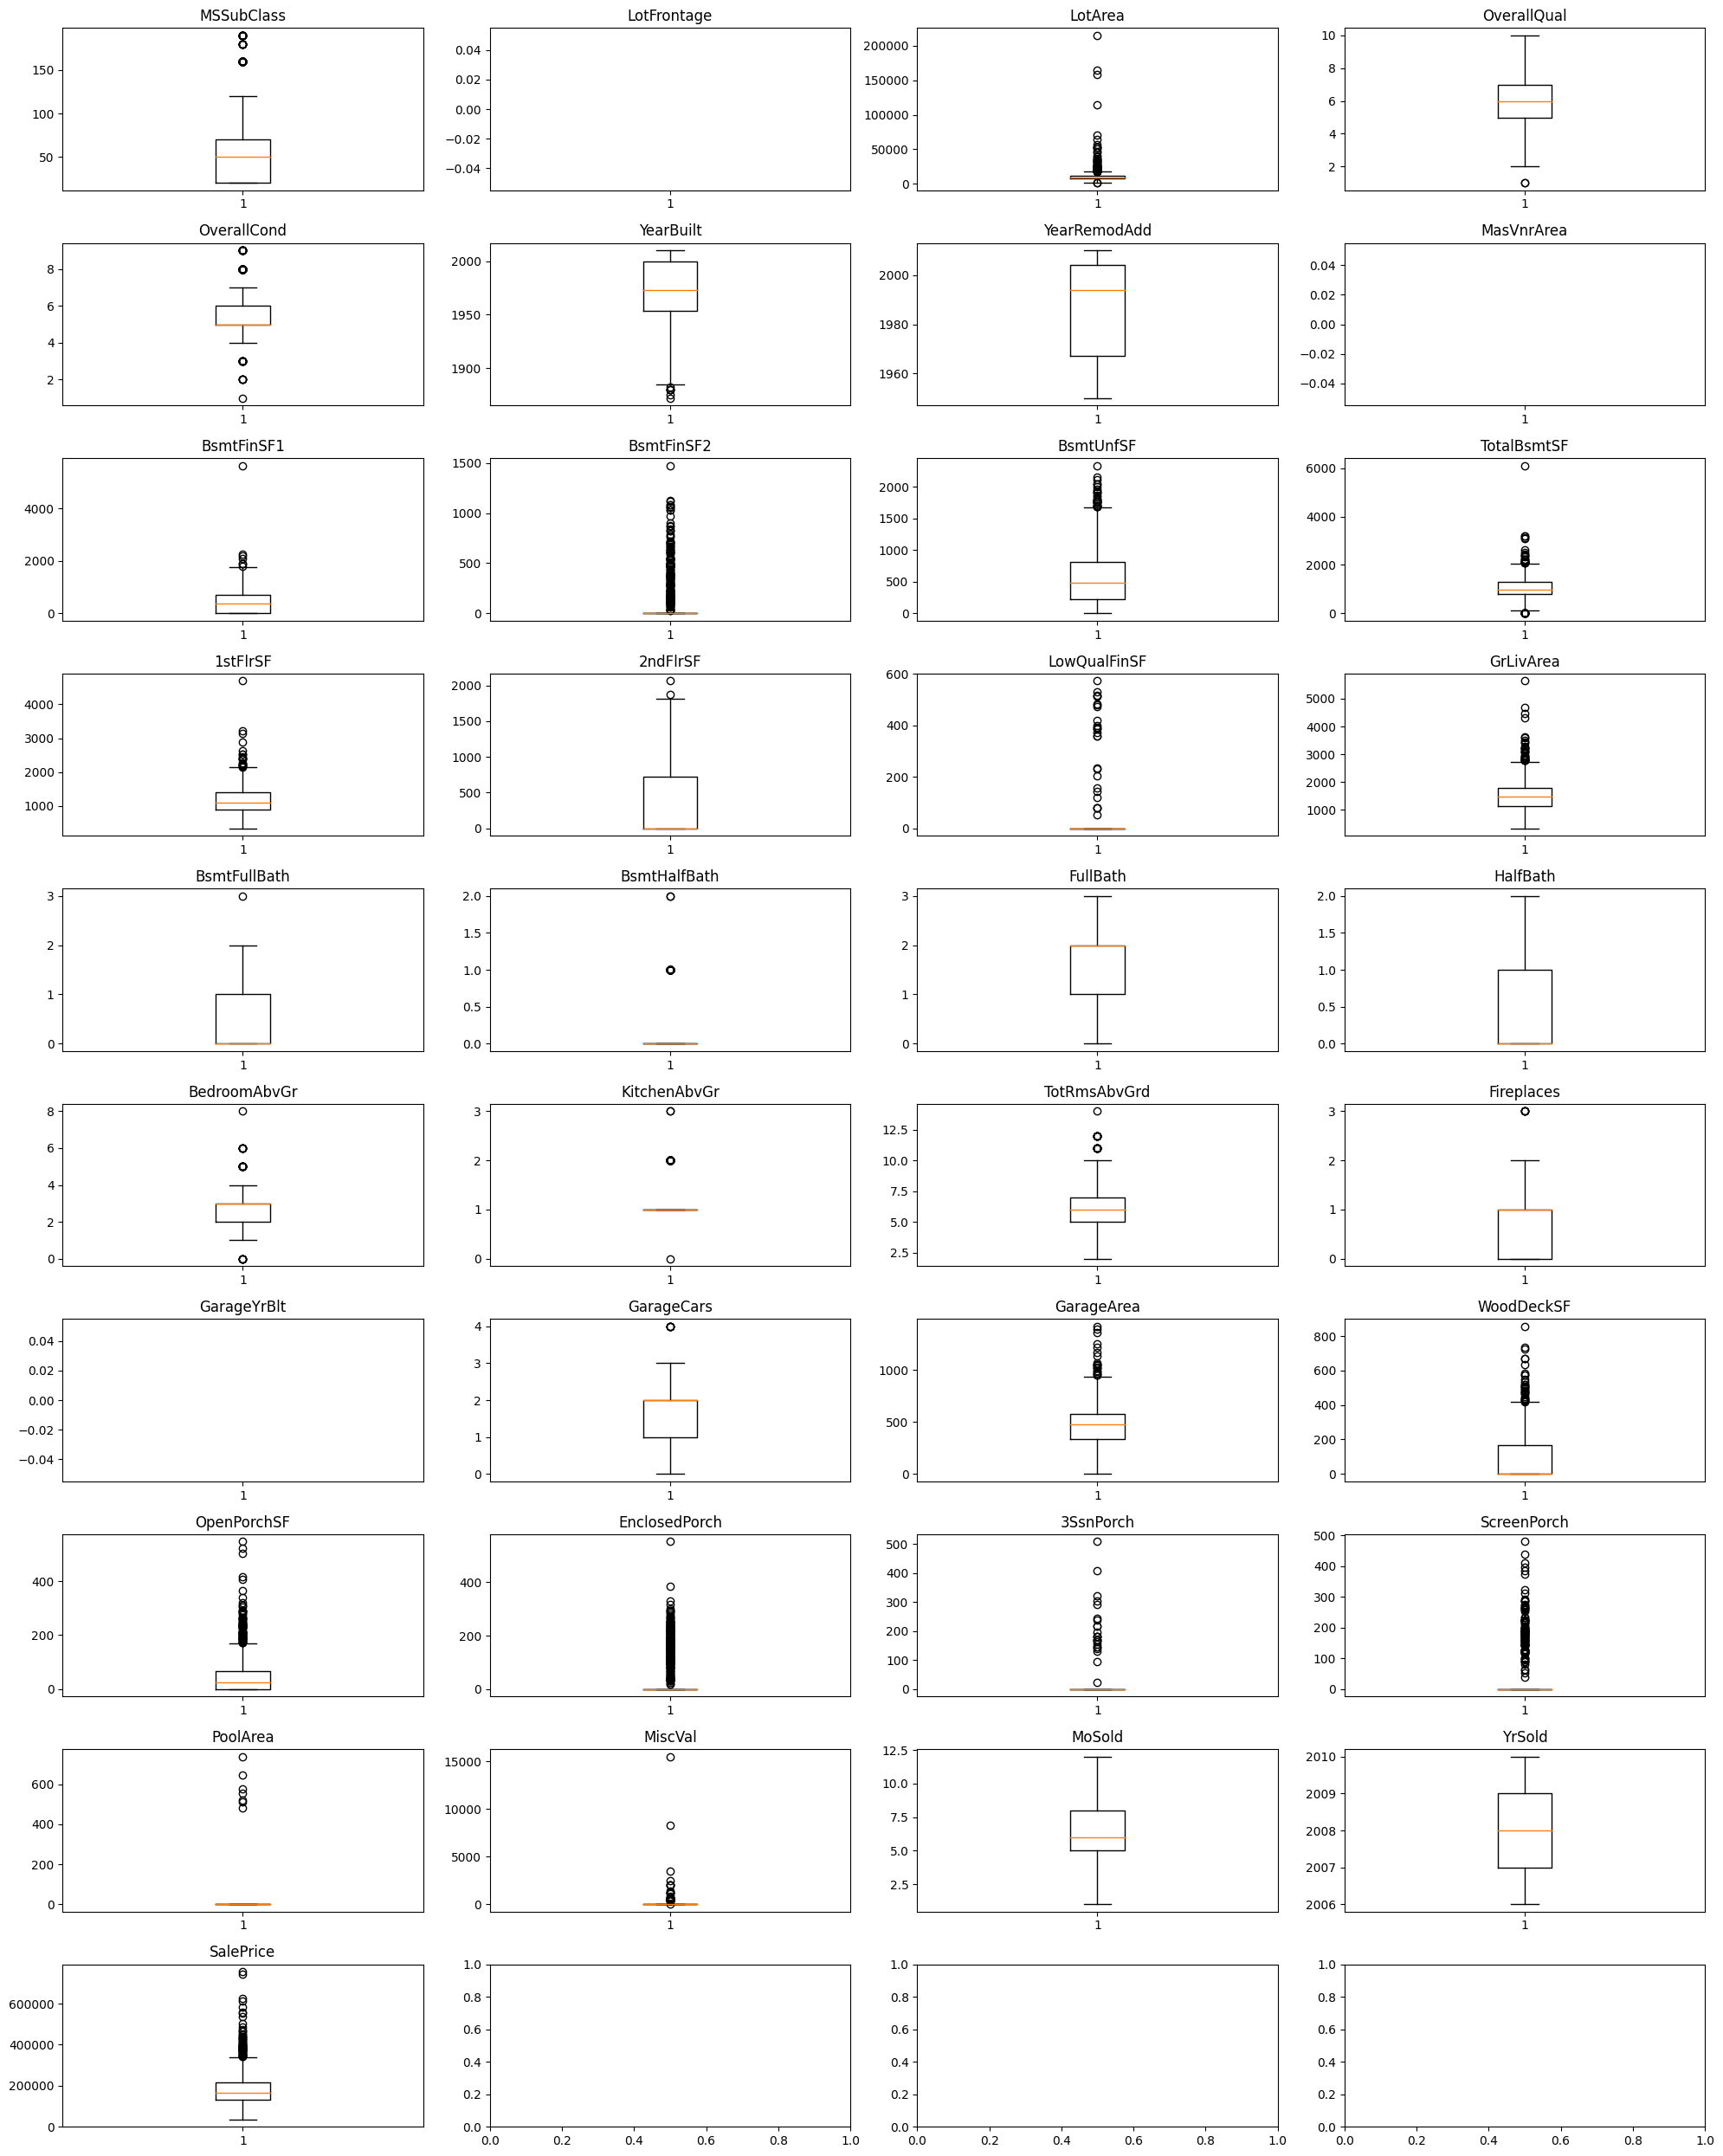

In [66]:
num=data.loc[:, data.columns!='Id']
numeric=num.select_dtypes(np.number)

fig, axs = plt.subplots(10, 4, figsize=(20, 25))

for i, col in enumerate(numeric.columns):
    axs[i // 4, i % 4].boxplot(data[col])
    axs[i // 4, i % 4].set_title(col)
    
plt.tight_layout()
plt.show()


### ¿En qué variables identifica un tipo de sesgo?
Creación del histograma

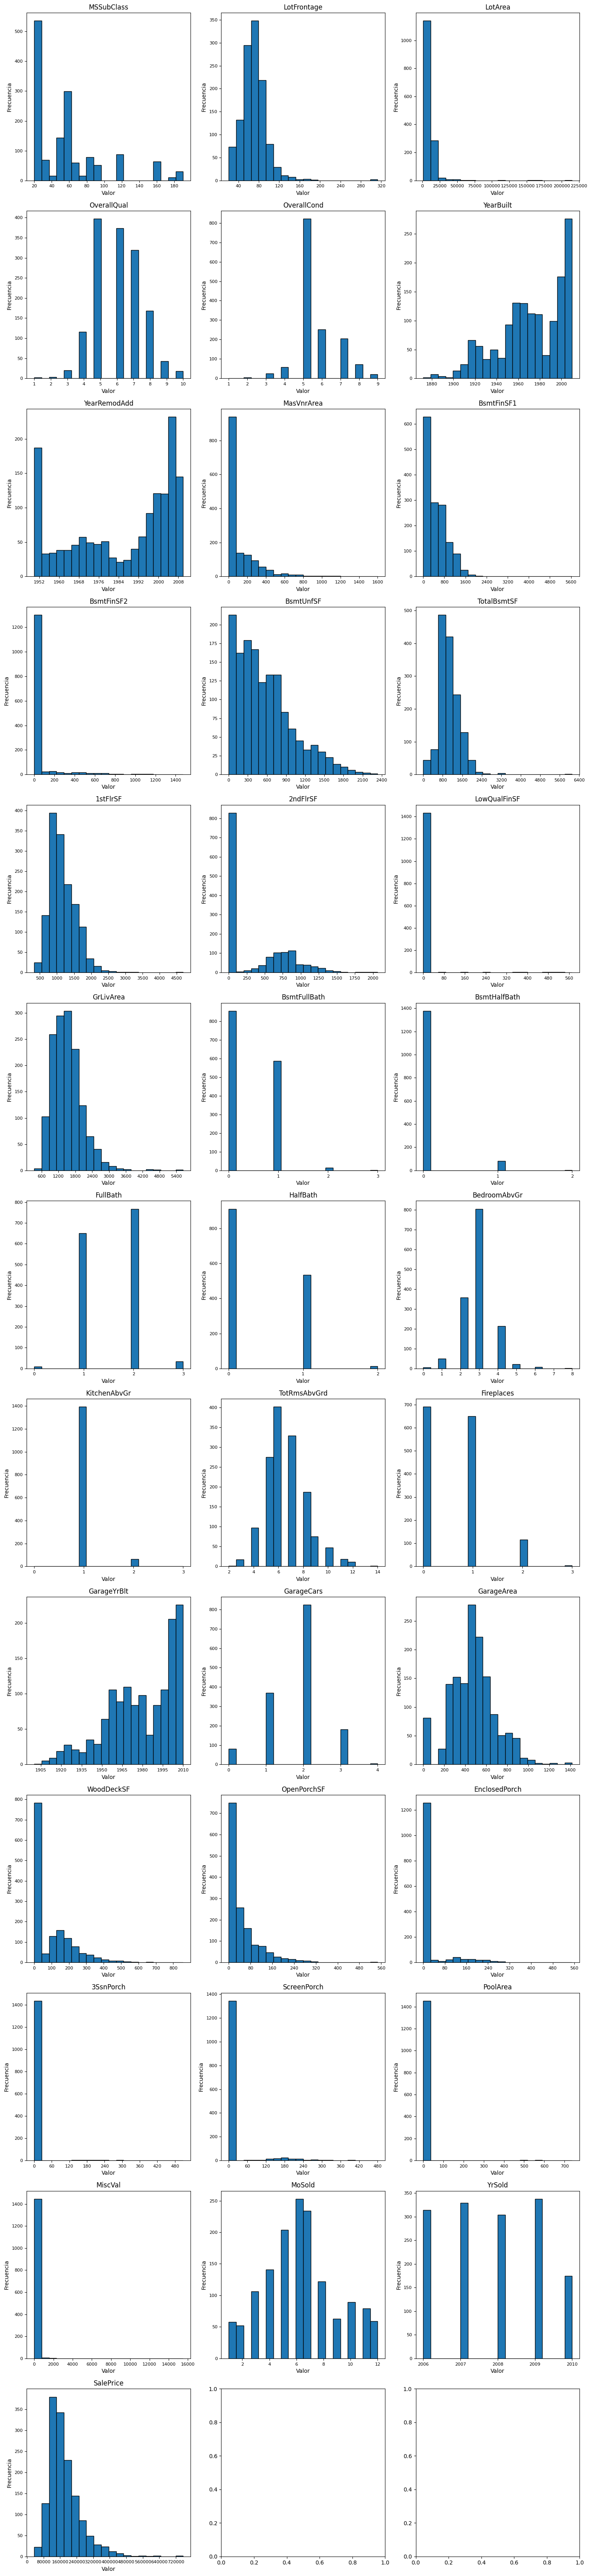

In [82]:
num_columns = len(numeric.columns)
num_rows = (num_columns + 2) // 3 
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(numeric.columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
    

plt.tight_layout()
plt.show()


In [57]:
asimetria = numeric.apply(skew)

umbral_sesgo = 0.5

columnas_con_sesgo_asimetria = asimetria[abs(asimetria) > umbral_sesgo]
columnas_sin_sesgo = asimetria[(abs(asimetria) <= umbral_sesgo)]

print("Columnas con sesgo en asimetría:")
print(columnas_con_sesgo_asimetria.index.tolist())

print("\nColumnas sin sesgo:")
print(columnas_sin_sesgo.index.tolist())

Columnas con sesgo en asimetría:
['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

Columnas sin sesgo:
['OverallQual', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


## ¿Sigue una distribución normal cada variable numérica?
### Prueba de Anderson Darling

In [ ]:
# num = data.loc[:, data.columns!='MSSubClass']
# numeric = num.select_dtypes(np.number)

In [ ]:
var = var.values.tolist()

In [ ]:
def get_anderson(col):
    anderson = scipy.stats.anderson(col, dist="norm")
    statistic = anderson.statistic
    critical_values = anderson.critical_values

    # Valores críticos
    # 15% = 0, 10% = 1, 5% = 2, 2.5% = 3, 1% = 4
    if statistic > critical_values[0]:
        return False
    else:
        return True


st = data[numeric.columns].apply(get_anderson)

anderson = pd.DataFrame({'normalDist': st})
anderson

,normalDist
MSSubClass,False
LotFrontage,True
LotArea,False
OverallQual,False
OverallCond,False
YearBuilt,False
YearRemodAdd,False
MasVnrArea,True
BsmtFinSF1,False
BsmtFinSF2,False
